In [1]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
mpl.rcParams['figure.figsize'] = [6,4]
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv('birth.csv')

In [3]:
df.head()

,Mom_weight,Mom_height,Mom_Age,Religion,Gender,Birth_Weight
0,41,152,25,1,1,2.06
1,42,157,25,3,1,1.70
2,44,153,23,2,1,1.59
3,45,177,19,2,1,2.73
4,46,160,19,2,1,2.08


In [4]:
df.shape

(189, 6)

### Missing Values

In [5]:
df.isnull().sum()

Mom_weight      0
Mom_height      0
Mom_Age         0
Religion        0
Gender          0
Birth_Weight    0
dtype: int64

##### So there are no missing values in Dataset

### Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mom_weight    189 non-null    int64  
 1   Mom_height    189 non-null    int64  
 2   Mom_Age       189 non-null    int64  
 3   Religion      189 non-null    int64  
 4   Gender        189 non-null    int64  
 5   Birth_Weight  189 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 9.0 KB


In [7]:
df.head(2)

,Mom_weight,Mom_height,Mom_Age,Religion,Gender,Birth_Weight
0,41,152,25,1,1,2.06
1,42,157,25,3,1,1.70


In [8]:
df.columns

Index(['Mom_weight', 'Mom_height', 'Mom_Age', 'Religion', 'Gender',
       'Birth_Weight'],
      dtype='object')

### Seperating Independent variable and dependent var

In [9]:
X = df.drop(['Birth_Weight'],axis = 'columns')

y = df['Birth_Weight']

#### unique values in each features

In [10]:
X.nunique()

Mom_weight    39
Mom_height    36
Mom_Age       24
Religion       3
Gender         2
dtype: int64

In [11]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in df if len(df[feature].unique())<10]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [12]:
discrete_feature

['Religion', 'Gender']

In [13]:
X[discrete_feature].head()

,Religion,Gender
0,1,1
1,3,1
2,2,1
3,2,1
4,2,1


### For Descrete

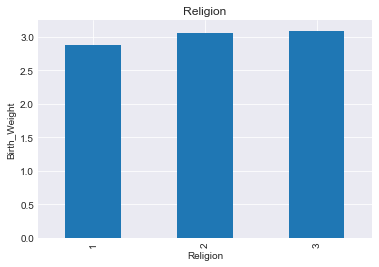

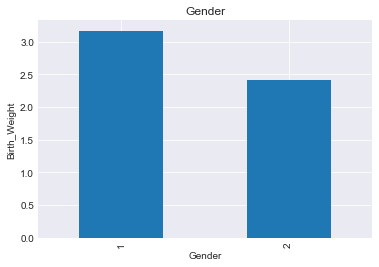

In [14]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=df.copy()
    plt.style.use('seaborn-darkgrid')
    data.groupby(feature)['Birth_Weight'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Birth_Weight')
    plt.title(feature)
    plt.show()

##### There is a relationship between variable number and Birth_Weight

### Continuous Variable

In [15]:
continuous_feature=[feature for feature in df if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


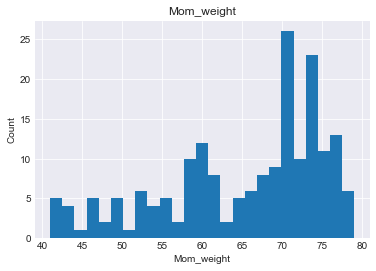

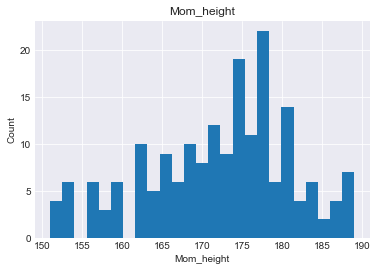

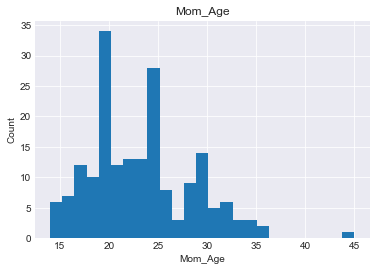

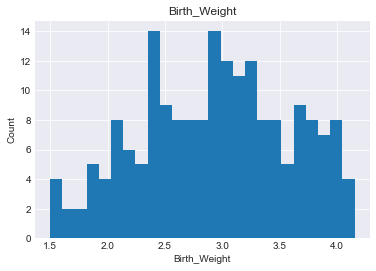

In [16]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

##### Note: For Continous Var we always use Distributions like histogram

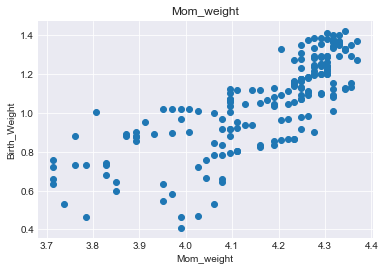

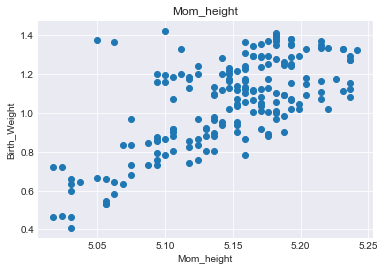

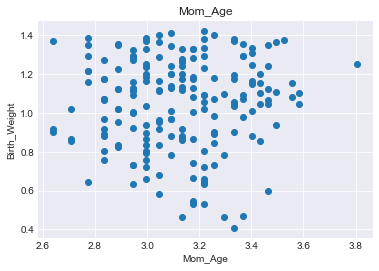

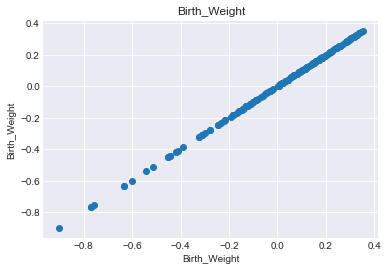

In [17]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Birth_Weight']=np.log(data['Birth_Weight'])
        plt.scatter(data[feature],data['Birth_Weight'])
        plt.xlabel(feature)
        plt.ylabel('Birth_Weight')
        plt.title(feature)
        plt.show()

### Outliers

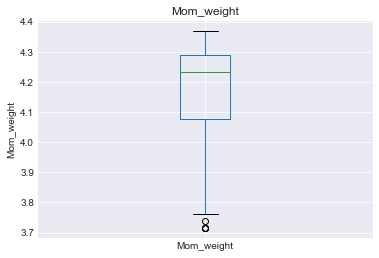

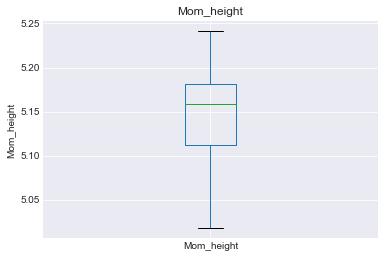

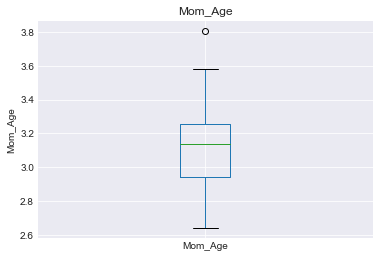

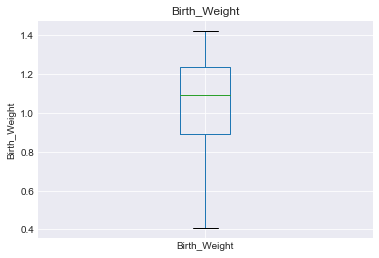

In [18]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [21]:
import statsmodels.api as sm
X = sm.add_constant(X)       # Adding 
X.head()

,const,Mom_weight,Mom_height,Mom_Age,Religion,Gender
0,1.0,41,152,25,1,1
1,1.0,42,157,25,3,1
2,1.0,44,153,23,2,1
3,1.0,45,177,19,2,1
4,1.0,46,160,19,2,1


In [22]:
model= sm.OLS(y, X).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Birth_Weight   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     96.51
Date:                Sun, 10 Jan 2021   Prob (F-statistic):           2.06e-49
Time:                        15:52:43   Log-Likelihood:                -63.059
No. Observations:                 189   AIC:                             138.1
Df Residuals:                     183   BIC:                             157.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2457      0.538     -6.034      0.000      -4.307      -2.184
Mom_weight     0.0377      0.003     11.717      0.000       0.031       0.044
Mom_height     0.0222      0.003      6.675      0.000       0.016       0.029
Mom_Age       -0.0012      0.005     -0.247      0.805      -0.011       0.008
Religion       0.0794      0.031      2.539      0.012       0.018       0.141
Gender        -0.1634      0.066     -2.491      0.014      -0.293      -0.034
==============================================================================
Omnibus:                        0.722   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.697   Jarque-Bera (JB):                0.450
Skew:                           0.095   Prob(JB):                        0.798
Kurtosis:                       3.145   Cond. No.                     4.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
X.iloc[:,1:].corr()

,Mom_weight,Mom_height,Mom_Age,Religion,Gender
Mom_weight,1.000000,0.537560,0.098097,0.072927,-0.429423
Mom_height,0.537560,1.000000,0.052864,-0.032210,-0.246298
Mom_Age,0.098097,0.052864,1.000000,-0.034402,-0.017711
Religion,0.072927,-0.032210,-0.034402,1.000000,-0.091901
Gender,-0.429423,-0.246298,-0.017711,-0.091901,1.000000


In [31]:
df.head()

,Mom_weight,Mom_height,Mom_Age,Religion,Gender,Birth_Weight
0,41,152,25,1,1,2.06
1,42,157,25,3,1,1.70
2,44,153,23,2,1,1.59
3,45,177,19,2,1,2.73
4,46,160,19,2,1,2.08


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape

<IPython.core.display.Javascript object>

((126, 5), (63, 5))

### Train Data

In [59]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

In [60]:
reg.coef_

array([ 0.03482116,  0.02411923,  0.00932599,  0.07554946, -0.20270534])

In [61]:
reg.intercept_

-3.547028268130791

In [62]:
df.head(1)

,Actual,Predicted
184,2.66,3.006865


##### Mathematical Formula = y = mx + c
Birth_Weight = m1 * Mom_weight + m2 * Mom_height + m3 * Mom_Age +....... + c

In [63]:
y_pred = reg.predict(X_test)

In [64]:
y_pred

array([3.00686469, 2.38789955, 2.77419629, 2.09996459, 3.42211742,
       3.80738919, 3.27869949, 3.06126495, 2.78010343, 3.51547557,
       3.48101584, 3.40031017, 3.13603249, 2.09434093, 3.52631183,
       3.22050453, 3.61936443, 2.05432159, 2.82180426, 3.29538152,
       3.3295245 , 1.95482371, 3.2464341 , 2.25542389, 3.2828273 ,
       3.31340622, 2.1793251 , 2.12641571, 2.82881278, 3.68404114,
       2.56743612, 2.2535351 , 2.63337932, 3.32338478, 2.62293238,
       3.86538804, 3.32403196, 3.50426079, 2.73669623, 3.09518654,
       3.91544233, 3.31268285, 3.53771722, 3.39092241, 2.84498196,
       3.44583325, 2.57699469, 3.38933918, 3.01156638, 2.14705971,
       2.90124893, 3.53999272, 3.35025588, 3.51453952, 3.40621182,
       2.66638693, 3.06864039, 2.26042371, 2.57172354, 3.47350567,
       3.22442504, 3.44213985, 1.83823696])

In [65]:
# Making Predictions
y_pred = reg.predict(X_test)  

# compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
184,2.66,3.006865
163,2.50,2.387900
18,2.75,2.774196
15,1.59,2.099965
67,3.59,3.422117
...,...,...
155,2.77,2.571724
181,3.15,3.473506
85,3.37,3.224425
90,3.65,3.442140


In [66]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3078886386219258
Mean Squared Error: 0.13892230562788477
Root Mean Squared Error: 0.37272282681355157
